In [ ]:
# Importing libraries and downloading the user data

import pandas as pd
import numpy as np

df = pd.read_csv('LFM-1b_users.txt', delimiter='\t' )
df.shape # Checking the shape of the data


(120322, 6)

In [ ]:
# print the dataframe
df.head(5)


,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
1,1206,NaN,-1,n,33103,1035849600
2,2622,NaN,-1,NaN,2030,1037404800
3,2732,NaN,-1,n,147,1037577600
4,3653,UK,31,m,18504,1041033600


In [ ]:
# Calculating the value counts
df['gender'].value_counts()

n    64339
m    39969
f    15802
Name: gender, dtype: int64

In [ ]:
# Checking for the missing value sum
df['gender'].isna().sum()

212

In [ ]:
# Selecting the country column
df['country']

0          UK
1         NaN
2         NaN
3         NaN
4          UK
         ... 
120317     BY
120318     RU
120319    NaN
120320    NaN
120321    NaN
Name: country, Length: 120322, dtype: object

In [ ]:
#Checking misimg data sum in the country column
df['country'].isna().sum()

65136

In [ ]:
# Performing data preprocessing(data quality check)
import numpy as np

df = df.replace('n',np.NaN)
print('Number of instances = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))

print('Number of missing values:')
for col in df.columns:
    print('\t%s: %d' % (col,df[col].isna().sum()))


for col in df.columns:
    print(col,df[col].isna().value_counts())

Number of instances = 120322
Number of attributes = 6
Number of missing values:
	user_id: 0
	country: 65136
	age: 0
	gender: 64551
	playcount: 0
	registered_unixtime: 0
user_id False    120322
Name: user_id, dtype: int64
country True     65136
False    55186
Name: country, dtype: int64
age False    120322
Name: age, dtype: int64
gender True     64551
False    55771
Name: gender, dtype: int64
playcount False    120322
Name: playcount, dtype: int64
registered_unixtime False    120322
Name: registered_unixtime, dtype: int64


In [ ]:
# Filtering gender column selecting both the male or female values both
data2 = df.loc[(df.gender =='f')|(df.gender =='m')]
data2

,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
4,3653,UK,31,m,18504,1041033600
5,4813,US,43,m,640,1050364800
7,5069,AT,30,m,31867,1051488000
10,6958,US,36,m,34788,1057536000
...,...,...,...,...,...,...
120315,50796677,PL,110,f,1495,1342344762
120316,50864998,PT,-1,m,74,1342696833
120317,50871714,BY,19,f,569,1342728447
120318,50900118,RU,19,m,96,1342887305


In [ ]:
# Country column has 5330 missing values which need to be removed
data2['country'].isna().value_counts()


False    50441
True      5330
Name: country, dtype: int64

In [ ]:
# Removing the missing values by dropping since we can't replace it (categorical)
df3 = data2.dropna()
df3

,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
4,3653,UK,31,m,18504,1041033600
5,4813,US,43,m,640,1050364800
7,5069,AT,30,m,31867,1051488000
10,6958,US,36,m,34788,1057536000
...,...,...,...,...,...,...
120313,50759670,US,25,m,467,1342153673
120315,50796677,PL,110,f,1495,1342344762
120316,50864998,PT,-1,m,74,1342696833
120317,50871714,BY,19,f,569,1342728447


<Axes: >

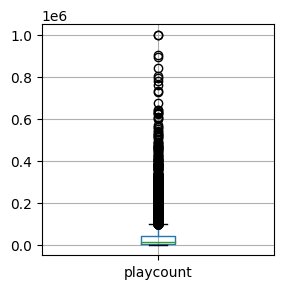

In [ ]:
# Now checking for outliers in the playcount data (numeric value) by plotting box plot
df3[['playcount']].boxplot(figsize=(3,3))

In [ ]:
# Calculating the inter-quartile range(IQR)
q1_PC = df3['playcount'].quantile(0.25)
q3_PC = df3['playcount'].quantile(0.75)
iqr_PC = q3_PC - q1_PC
q1_PC,q3_PC,iqr_PC

(1768.0, 41079.0, 39311.0)

In [ ]:
# Calculating the upper and the lower limits of the IQR
upper_limit_PC = q3_PC + (1.5 * iqr_PC)
lower_limit_PC = q1_PC - (1.5 * iqr_PC)
upper_limit_PC,lower_limit_PC


(100045.5, -57198.5)

In [ ]:
# Defining and loading the dataframe only within the playcount column IQR
df3.loc[(df3['playcount'] > upper_limit_PC) | (df3['playcount'] < lower_limit_PC)]

,user_id,country,age,gender,playcount,registered_unixtime
27,1001190,UK,48,m,462259,1045601053
30,1001713,US,30,m,120265,1046058189
41,1004584,RU,30,m,207703,1049929668
45,1007115,US,29,f,241039,1053996877
46,1007118,US,30,f,101526,1054001910
...,...,...,...,...,...,...
103641,49138650,UK,21,m,103242,1334114847
104633,49204771,CA,21,m,144521,1334380756
106968,49352578,CA,17,m,136670,1334989794
110914,49554259,DE,18,f,106070,1335871345


In [ ]:
# Assigning the dataframe to a variable df_new and printing values of playcount before & after removal of the outliers
df_new = df3.loc[(df3['playcount'] < upper_limit_PC) & (df3['playcount'] > lower_limit_PC)]
print ('Before removing outliers:', len(df3['playcount']))
print ('After removing outliers:', len(df_new['playcount']))
print('Outliers:', len(df3['playcount']) - len(df_new['playcount']))

Before removing outliers: 50441
After removing outliers: 47586
Outliers: 2855


<Axes: >

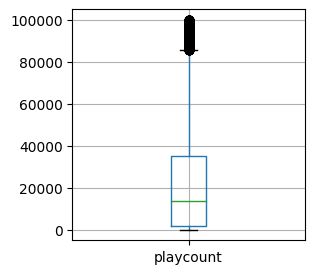

In [ ]:
# Checking again for the outliers
df_new[['playcount']].boxplot(figsize=(3,3))

In [ ]:
# Saving the dataFrame to a text (.txt) file with tab-separated values for analysis as 'output_data_new.txt'
output_file = 'output_data_new.txt'
df_new.to_csv(output_file, sep='\t', index=False)


In [ ]:
#Loading the df_new
df_new

,user_id,country,age,gender,playcount,registered_unixtime
0,384,UK,35,m,42139,1035849600
4,3653,UK,31,m,18504,1041033600
5,4813,US,43,m,640,1050364800
7,5069,AT,30,m,31867,1051488000
10,6958,US,36,m,34788,1057536000
...,...,...,...,...,...,...
120313,50759670,US,25,m,467,1342153673
120315,50796677,PL,110,f,1495,1342344762
120316,50864998,PT,-1,m,74,1342696833
120317,50871714,BY,19,f,569,1342728447


In [ ]:
# Chceking the male and female gender counts
df_new.gender.value_counts()

m    34085
f    13501
Name: gender, dtype: int64

In [ ]:
#  Selecting only male and female from the new dataset
data2 = df.loc[(df.gender =='f')|(df.gender =='m')]

In [ ]:
#  Selecting country and gender column from the processed data set
df_demo = df_new.loc[:,['country', 'gender']]
df_demo

,country,gender
0,UK,m
4,UK,m
5,US,m
7,AT,m
10,US,m
...,...,...
120313,US,m
120315,PL,f
120316,PT,m
120317,BY,f


In [ ]:
# Grouping the data by 'country' and 'gender', and count the occurrences
gender_counts = df_demo.groupby(['country', 'gender']).size().unstack(fill_value=0)

# Printing the counts for each country
print(gender_counts)

gender    f   m
country        
AD        0   7
AE        5  11
AF        1   9
AL        1   3
AM        5   6
...      ..  ..
VN        5  25
WF        0   3
WS        0   1
ZA       14  61
ZW        0   6

[195 rows x 2 columns]


In [ ]:
# Suming the counts of males and females along the rows to get the total count
gender_counts['sum'] = gender_counts.sum(axis=1)
gender_counts_sorted = gender_counts.sort_values(by='sum', ascending=False)

# Calculating the total sum across all countries
total_sum = gender_counts_sorted['sum'].sum()

# Calculating the percentage for each column 'f', 'm', and 'sum'
gender_counts_sorted['percentage_f'] = (gender_counts_sorted['f'] / total_sum) * 100
gender_counts_sorted['percentage_m'] = (gender_counts_sorted['m'] / total_sum) * 100
gender_counts_sorted['percentage_sum'] = (gender_counts_sorted['sum'] / total_sum) * 100
print(gender_counts_sorted)

gender      f     m   sum  percentage_f  percentage_m  percentage_sum
country                                                              
US       2492  6233  8725      5.236834     13.098390       18.335225
RU       1305  3186  4491      2.742403      6.695247        9.437650
PL       1632  2327  3959      3.429580      4.890094        8.319674
DE        950  2974  3924      1.996385      6.249737        8.246123
UK        840  3001  3841      1.765225      6.306477        8.071702
...       ...   ...   ...           ...           ...             ...
TG          0     1     1      0.000000      0.002101        0.002101
TF          1     0     1      0.002101      0.000000        0.002101
TD          1     0     1      0.002101      0.000000        0.002101
GN          0     1     1      0.000000      0.002101        0.002101
LS          0     1     1      0.000000      0.002101        0.002101

[195 rows x 6 columns]


In [ ]:
#Loading the top 12
gender_counts_sorted.head(12)

gender,f,m,sum,percentage_f,percentage_m,percentage_sum
country,,,,,,
US,2492,6233,8725,5.236834,13.098390,18.335225
RU,1305,3186,4491,2.742403,6.695247,9.437650
PL,1632,2327,3959,3.429580,4.890094,8.319674
DE,950,2974,3924,1.996385,6.249737,8.246123
UK,840,3001,3841,1.765225,6.306477,8.071702
BR,1201,2345,3546,2.523852,4.927920,7.451772
NL,274,926,1200,0.575800,1.945950,2.521750
FI,339,846,1185,0.712394,1.777834,2.490228
ES,297,753,1050,0.624133,1.582398,2.206531


In [ ]:
# Chceking the sum of the values
total_sum = gender_counts_sorted['sum'].sum()
total_sum

47586

In [ ]:
# Selecting the top 11 rows from the sorted DataFrame
top = gender_counts_sorted.head(11)

# Printing the top 11 rows
print(top)

gender      f     m   sum  percentage_f  percentage_m  percentage_sum
country                                                              
US       2492  6233  8725      5.236834     13.098390       18.335225
RU       1305  3186  4491      2.742403      6.695247        9.437650
PL       1632  2327  3959      3.429580      4.890094        8.319674
DE        950  2974  3924      1.996385      6.249737        8.246123
UK        840  3001  3841      1.765225      6.306477        8.071702
BR       1201  2345  3546      2.523852      4.927920        7.451772
NL        274   926  1200      0.575800      1.945950        2.521750
FI        339   846  1185      0.712394      1.777834        2.490228
ES        297   753  1050      0.624133      1.582398        2.206531
UA        277   741  1018      0.582104      1.557181        2.139285
SE        270   730  1000      0.567394      1.534065        2.101458


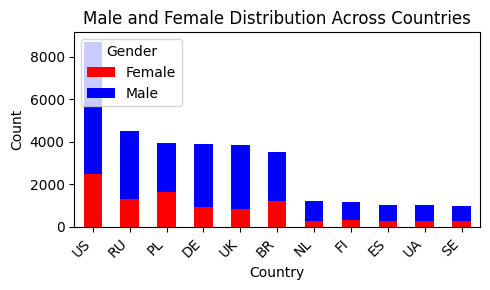

In [ ]:
# Importing the library and plotting bar graph
import matplotlib.pyplot as plt

# Creating the bar plot
ax = top[['f', 'm' ]].plot(kind='bar', stacked=True, figsize=(5, 3), color=['red', 'blue'])

# Setting labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Male and Female Distribution Across Countries')

# Displaying the plot
plt.legend(title='Gender', loc='upper left', labels=['Female', 'Male'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()